In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lsim, TransferFunction
from matplotlib.animation import FuncAnimation
from matplotlib import rc
rc('animation', html='jshtml')

In [2]:
# Parámetros
m = 1000    # Masa [kg]
k = 48000   # Constante del resorte [N/m]
c = 4000    # Constante de amortiguamiento [N.s/m]

# Modelo de animación
L0 = 0.7    # Longitud relajada del resorte [m]
h = 0.3     # Altura del bloque [m]
a = 1       # Ancho del bloque [m]

tF = 8     # Tiempo final [s]
fR = 10     # Tasa de cuadros [fps]
dt = 1 / fR # Resolución temporal [s]
time = np.linspace(0, tF, int(tF * fR)) # Tiempo [s]

freq_ini = 0.1  # Frecuencia inicial [Hz]
freq_end = 3    # Frecuencia final [Hz]
f = (freq_end - freq_ini) / tF * time + freq_ini  # Frecuencia [Hz]
w = 2 * np.pi * f  # Frecuencia [rad/s]
A = 0.1         # Amplitud [m]

In [3]:
# Desplazamiento [m]
u_vet = A * np.sin(2 * np.pi * ((freq_end - freq_ini) / tF * time + freq_ini) * time)

# Simulación
# Modelo de función de transferencia
num = [c, k]
den = [m, c, k]
system = TransferFunction(num, den)
t, y, _ = lsim(system, U=u_vet, T=time)

# Posición vertical absoluta de la masa (punto central inferior)
yc = y + L0

# Información de la base
baseX = np.array([-0.4, 0.4])

In [4]:
# Configuración de la figura
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_xlim([-1, 1])
ax.set_ylim([-0.2, 1.3])
ax.set_xticks(np.arange(-1, 1.1, 0.2))
ax.set_yticks(np.arange(-0.2, 1.4, 0.2))
ax.grid(ls='--', lw=0.4)
ax.set_ylabel('y [m]')
ax.set_title("Masa-resorte-amortiguador - 1DOF", fontweight='bold', fontsize=14, y = 1.02)

# Inicialización de la animación
base_line, = ax.plot([], [], 'k', linewidth=2)
mass_patch = plt.Rectangle((-a / 2, yc[0]), a, h, color='r')
ax.add_patch(mass_patch)

def plot_spring(yb, yc):
    rodPct = 0.11
    springPct = 1 / 3
    L = (yc - yb) - 2 * rodPct * L0
    center = -0.2
    wid = 0.1
    spring_coords = [
        ([center, center], [yb, yb + rodPct * L0]),
        ([center, center], [yc, yc - rodPct * L0]),
        ([center, center + wid], [yb + rodPct * L0, yb + rodPct * L0]),
        ([center - wid, center + wid], [yb + rodPct * L0 + springPct * L, yb + rodPct * L0]),
        ([center - wid, center + wid], [yb + rodPct * L0 + 2 * springPct * L, yb + rodPct * L0 + springPct * L]),
        ([center - wid, center + wid], [yb + rodPct * L0 + 3 * springPct * L, yb + rodPct * L0 + 2 * springPct * L]),
        ([center - wid, center], [yb + rodPct * L0 + 3 * springPct * L, yb + rodPct * L0 + 3 * springPct * L]),
        ([center - wid, center + wid], [yb + rodPct * L0 + springPct * L, yb + rodPct * L0 + springPct * L]),
        ([center - wid, center + wid], [yb + rodPct * L0 + 2 * springPct * L, yb + rodPct * L0 + 2 * springPct * L])
    ]
    return spring_coords

def plot_damper(yb, yc):
    rodLowerPct = 0.1
    rodUpperPct = 0.6
    cylinderPct = 0.6
    center = 0.2
    wid = 0.05
    damper_coords = [
        ([center, center], [yb, yb + rodLowerPct * L0]),
        ([center - wid, center + wid], [yb + rodLowerPct * L0, yb + rodLowerPct * L0]),
        ([center - wid, center - wid], [yb + rodLowerPct * L0, yb + rodLowerPct * L0 + cylinderPct * L0]),
        ([center + wid, center + wid], [yb + rodLowerPct * L0, yb + rodLowerPct * L0 + cylinderPct * L0]),
        ([center, center], [yc, yc - rodUpperPct * L0]),
        ([center - 0.8 * wid, center + 0.8 * wid], [yc - rodUpperPct * L0, yc - rodUpperPct * L0])
    ]
    return damper_coords

def plot_soil(yb):
    center = 0
    wid = baseX[0]
    damper_coords = [
        ([center - wid, center + wid], [yb, yb])]
    return damper_coords

def update(frame):
    base_line.set_data(baseX, [u_vet[frame], u_vet[frame]])
    mass_patch.set_xy((-a / 2, yc[frame]))

    for patch in ax.patches:
        patch.remove()

    for line in ax.lines:
        line.remove()

    ax.add_patch(mass_patch)
    ax.plot(baseX*1.5, [-A, -A], 'k', lw=1.2, ls = "--")
    ax.plot(baseX*1.5, [max(yc), max(yc)], 'k', lw=1.2, ls = "--")
    ax.plot(baseX*1.5, [min(yc), min(yc)], 'k', lw=1.2, ls = "--")
    ax.plot(baseX*1.5, [A, A], 'k', lw=1.2, ls = "--")

    for coord in plot_spring(u_vet[frame], yc[frame]):
      ax.plot(coord[0], coord[1], 'k')

    for coord in plot_damper(u_vet[frame], yc[frame]):
      ax.plot(coord[0], coord[1], 'k')

    for coord in plot_soil(u_vet[frame]):
      ax.plot(coord[0], coord[1], 'k', lw=5)

    return base_line, mass_patch

ani = FuncAnimation(fig, update, frames=len(time), interval = 60, blit=True)
# ani.save("intento6.gif", writer = "pillow")
plt.close()
ani

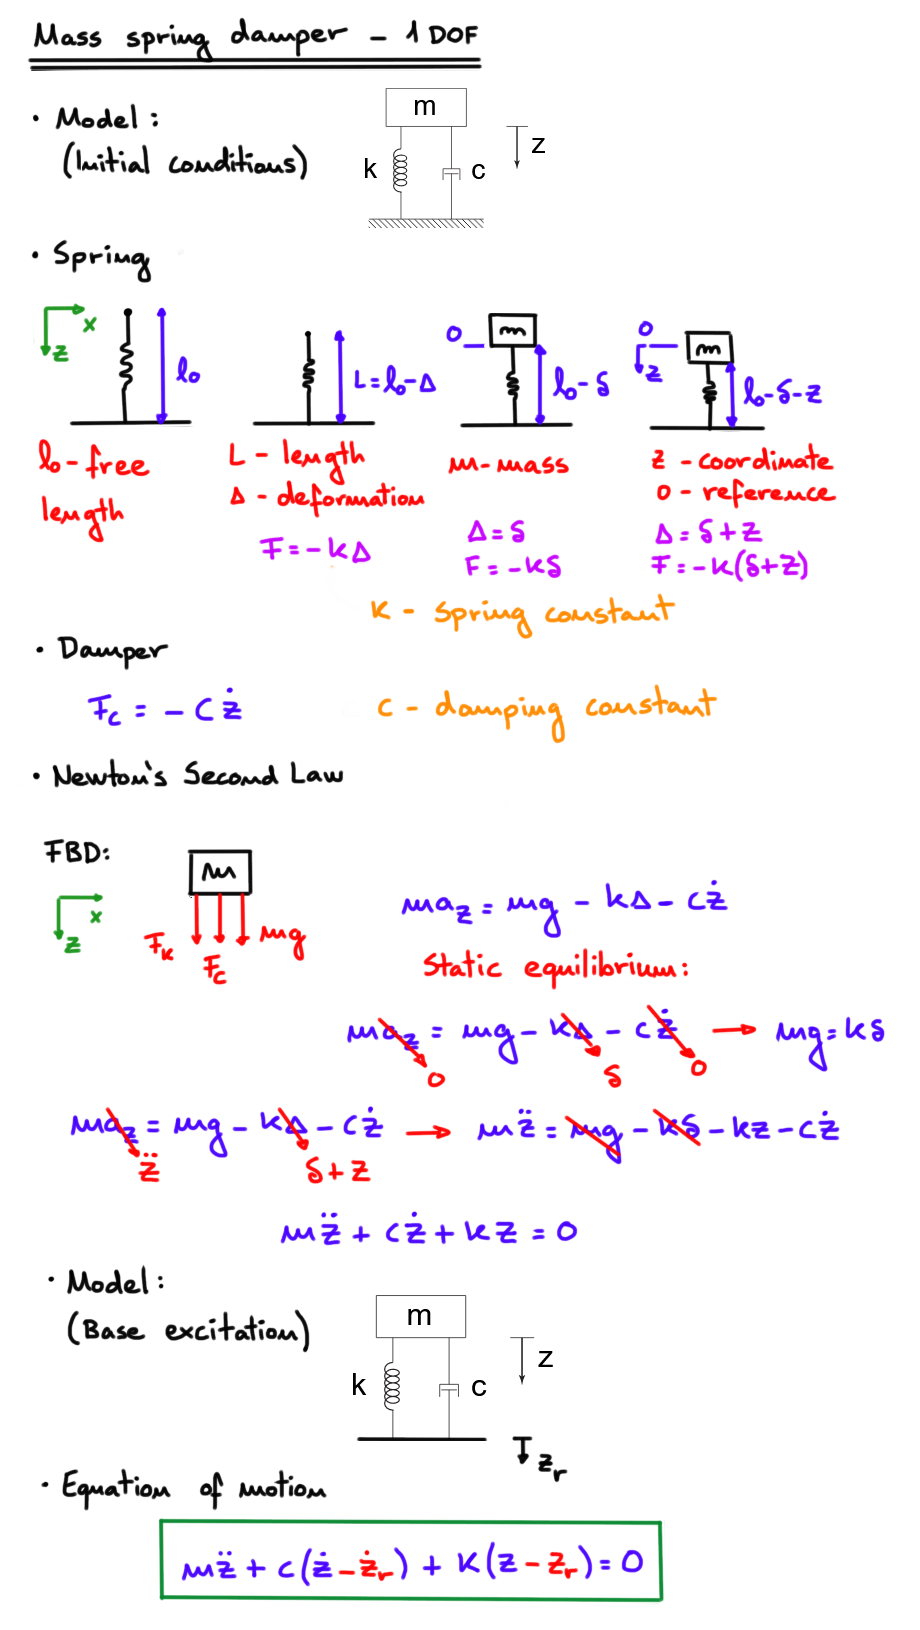